In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cude' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch_1/2, step=100/600, loss=0.4004
epoch_1/2, step=200/600, loss=0.3848
epoch_1/2, step=300/600, loss=0.2749
epoch_1/2, step=400/600, loss=0.3847
epoch_1/2, step=500/600, loss=0.3816
epoch_1/2, step=600/600, loss=0.2695
epoch_2/2, step=100/600, loss=0.2078
epoch_2/2, step=200/600, loss=0.1446
epoch_2/2, step=300/600, loss=0.0961
epoch_2/2, step=400/600, loss=0.1748
epoch_2/2, step=500/600, loss=0.1810
epoch_2/2, step=600/600, loss=0.2086
acc = 94.9%


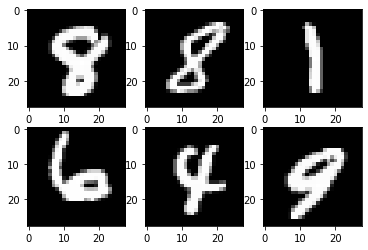

In [25]:
# hyperparameters
inp_size  = 784 # 28x28
hid_size  = 100
num_class = 10
num_epoch = 2
batch_size= 100
learn_rate= 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
# plt.show()

class NeuralNet(nn.Module):
    def __init__(self, inp_size, hid_size, num_class):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(inp_size, hid_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hid_size, num_class)

    def forward(self, x):
        out1 = self.l1(x)
        out2 = self.relu(out1)
        out3 = self.l2(out2)
        
        return out3

model = NeuralNet(inp_size, hid_size, num_class)
crit  = nn.CrossEntropyLoss()

opt   = torch.optim.Adam(model.parameters(), lr=learn_rate)

# training loop
n_tot_step = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward 
        outputs = model(images)
        loss = crit(outputs, labels)
                
        # backward
        opt.zero_grad()
        loss.backward()
        opt.step()

        if (i+1)%100 == 0:
            print(f'epoch_{epoch+1}/{num_epoch}, step={i+1}/{n_tot_step}, loss={loss.item():.4f}')

# testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        output = model(images)
        
        _, predictions = torch.max(output, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f"acc = {acc}%")


